# Tutorial - Time series data in Pandas

### Datetime indexes in Pandas

Dates and times can be used as the index of a Pandas data frame. Many time series methods which use data in Pandas format rely on the time information in the index to provide time series functionality. Although there are several types of indexes specific for that, this tutorial is restricted to the type `DatetimeIndex`. To illustrate the use of date indexes, I use data on the Apple Inc. stock prices in the Nasdaq stock market, for the year 2019.

In [1]:
import pandas as pd

In [2]:
url1 = 'https://raw.githubusercontent.com/cinnData/DataSci/main/'
url2 = '4.%20Basic%20stats%20in%20Pandas/aapl.csv'
url = url1 + url2
df = pd.read_csv(url, index_col=0, parse_dates=True)

These data come in the well known OHLC format:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       251 non-null    float64
 1   high       251 non-null    float64
 2   low        251 non-null    float64
 3   close      251 non-null    float64
 4   adj_close  251 non-null    float64
 5   volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Note that, with `index_col=0`, we specify that the first column is to be used as the index. The addtional argument `parse_dates=True` specifies that the column taken for the index is to be converted to `DatetimeIndex`.

Let us check this index:

In [4]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='date', length=251, freq=None)

Pandas inherits data type `datetime64` from Numpy. The expression `'ns'` within the square brackets means nanoseconds. The index takes the name of the corresponding column in the data source file (`date`). To stop this name being displayed as a label in the horizontal axis of the forthcoming line plots, I get rid of it with:

In [5]:
df.index.name = None

This index can be used to select rows, as the following examples shows. Mind that the selection is based on the dates, irrespective order of the index values in the data frame.

In [6]:
df[:'2019-01-08']

,open,high,low,close,adj_close,volume
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.516388,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.125412,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.064575,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,144.741714,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.500916,41025300


The structure of the index also helps to select the data in special ways. For instance, to select the Friday opening prices, you can apply the function `day_name` to the index:

In [7]:
df['open'][df.index.day_name() == 'Friday'].head()

2019-01-04    144.529999
2019-01-11    152.880005
2019-01-18    157.500000
2019-01-25    155.479996
2019-02-01    166.960007
Name: open, dtype: float64

Alternatively, you could use `df.index.weekday == 4`. To select the opening prices from a particular month:

In [8]:
df['open'][df.index.month == 2].head()

2019-02-01    166.960007
2019-02-04    167.410004
2019-02-05    172.860001
2019-02-06    174.649994
2019-02-07    172.399994
Name: open, dtype: float64

Also, Pandas takes advantage of the index to format the horizontal axis in a better way, as shown in following chart:

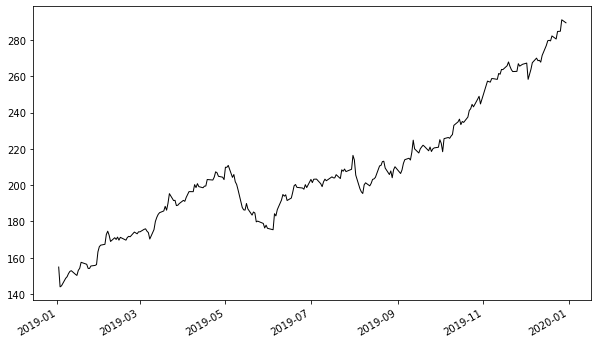

In [9]:
df['open'].plot(figsize=(10,6), color='black', linewidth=1);

### Calculating returns

**Daily returns** can be obtained with the Pandas function `pct_change`. Though the first observation gets a `NaN` value, because there is no return for the first day, the index of the series is preserved. Mind that `pct_change` uses the current order of the rows, not the date values of the index, so the data have to sorted by date.

In [10]:
d_return = df['open'].pct_change()
d_return.head()

2019-01-02         NaN
2019-01-03   -0.070437
2019-01-04    0.003820
2019-01-07    0.028852
2019-01-08    0.005783
Name: open, dtype: float64

The daily returns can be plotted in the same way as the prices:

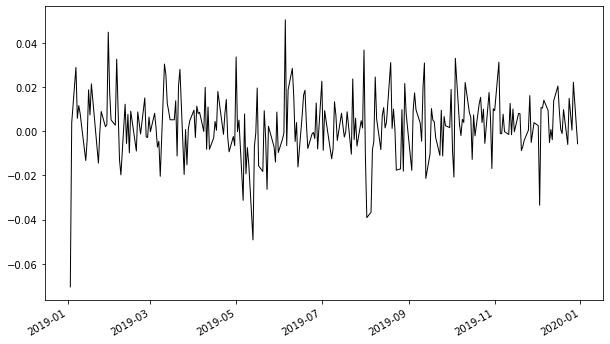

In [11]:
d_return.plot(figsize=(10,6), color='black', linewidth=1);

Weekly returns, based on the percentage change across Fridays, can be calculated after filtering out the rest of the days. Beware that this could be wrong for the weeks in which the Friday is not a trading day.

In [12]:
w_return = df[df.index.weekday == 4]['open'].pct_change()
w_return.head()

2019-01-04         NaN
2019-01-11    0.057774
2019-01-18    0.030220
2019-01-25   -0.012825
2019-02-01    0.073836
Name: open, dtype: float64

### Resampling

Aggregating time series data by a new time period is often called **resampling**. The method `resample`, designed for Pandas data frames with a `Datetime` index is a special case of `groupby`, which is driven by the index. In the following example, I apply this method to get the total weekly traded volume of Apple stock.

In [13]:
w_vol = df['open'].resample('W').sum()

The same can be done to aggregate the data by month. But the weekly aggregates have a particularity, which is that the year cannot be exactly partitioned into weeks. What the above code line creates in this example is a series of 53 terms, corresponding to the 53 weeks that intersect the year 2019. Hence, in the series `w_vol`, the first and the last terms involve only part of the week. Note that the series is indexed by the Sundays (even when they are not included in the actual data).

In [14]:
w_vol.head(3)

2019-01-06    443.399994
2019-01-13    754.929993
2019-01-20    765.900009
Freq: W-SUN, Name: open, dtype: float64

In [15]:
w_vol.tail(3)

2019-12-22    1398.100006
2019-12-29    1141.160003
2020-01-05     289.459991
Freq: W-SUN, Name: open, dtype: float64

We can get a line plot of the weekly returns with:

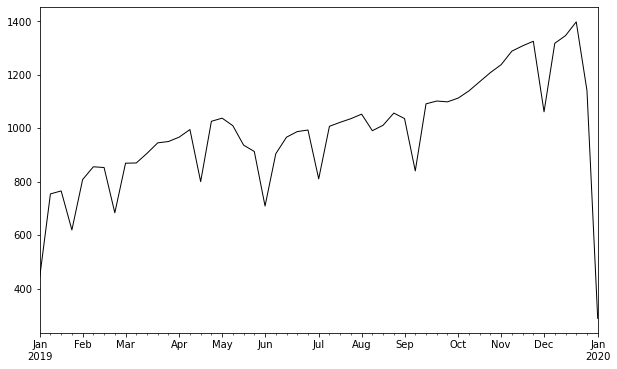

In [16]:
w_vol.plot(figsize=(10,6), color='black', linewidth=1);

### Rolling windows

The logic of `rolling` is similar to that of `resampling`, but it groups the rows around every value of the index (except at the extremes). The set of these groups is called a **rolling window**. This is easily seen in the following calculation, which extracts a **moving average** (MA) trend for the opening prices (moving average is a popular name for the rolling mean).

In [17]:
df['open'].rolling(5).mean().head(10)

2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08    148.331998
2019-01-09    147.611997
2019-01-10    149.315997
2019-01-11    150.985999
2019-01-14    151.416000
2019-01-15    151.558002
Name: open, dtype: float64

As a default, the terms included in the rolling window are collected leftwards. Here the length has been set to 5. So, the first 4 terms of the moving average are `NaN`'s. But you may prefer to center the window in the current observation. In that case, you will get 2 `NaN`'s at each extreme of the series. This is done with:

In [18]:
ma = df['open'].rolling(5, center=True).mean()
ma.head(10)

2019-01-02           NaN
2019-01-03           NaN
2019-01-04    148.331998
2019-01-07    147.611997
2019-01-08    149.315997
2019-01-09    150.985999
2019-01-10    151.416000
2019-01-11    151.558002
2019-01-14    151.916003
2019-01-15    152.256003
Name: open, dtype: float64

A moving average is frequently used to create a **nonparametric trend**, that is, a trend which is not given as a mathematical function of time, like a linear or quadratic trend. The chart below illustrates this. The dashed line corresponds to the actual prices, and the solid line to the MA trend.

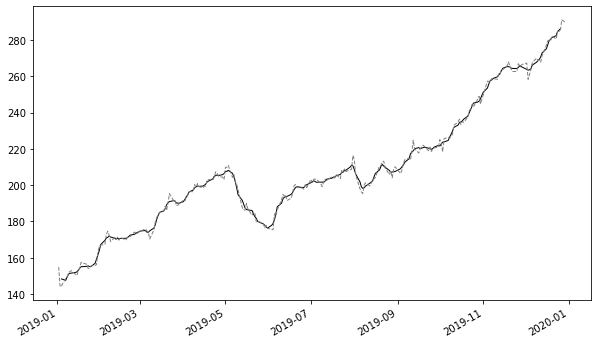

In [19]:
ma.plot(figsize=(10,6), color='black', linewidth=1)
df['open'].plot(color='gray', linestyle='--', linewidth=1);